In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [3]:
dtrain = pd.read_csv("../input/digit-recognizer/train.csv")

dtest = pd.read_csv("../input/digit-recognizer/test.csv")

df = pd.concat((dtrain, dtest))

In [4]:
features = df.columns.drop('label')
print(features.shape)

dum = pd.get_dummies(df, columns=['label'])

df = pd.concat([df['label'], dum], axis=1) 

(784,)


In [5]:
dtrain.loc[0] #1 label + 28*28 gray scale pixels--> 0==black, 255 == white

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

(28, 28)


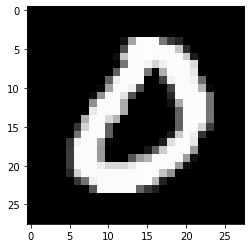

In [6]:
import matplotlib.image as img

#image = img.imread(dtrain.loc[0])
arr = np.asarray(np.array(dtest.loc[6]).reshape(-28, 28))
print(arr.shape)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [7]:
dtrain.loc[1055][0]

8

In [8]:
train = df[df['label'].notna()]
test = df[df['label'].isna()]

X_t, X_v, y_t, y_v = train_test_split(train[features]/255.0, train[['label_0.0', 'label_1.0', 'label_2.0', 'label_3.0', 'label_4.0',
       'label_5.0', 'label_6.0', 'label_7.0', 'label_8.0', 'label_9.0']], test_size=0.01, random_state=22)


In [9]:
early_stopping_monitor = EarlyStopping(patience=1)

In [10]:
#model2 = Sequential()
#model2.add(Conv2D(64, kernel_size=(5,5),input_shape=(28, 28, 1),activation='relu'))
#model2.add(Conv2D(64, kernel_size=(3,3),activation='relu'))#,padding='same'
#model2.add(Conv2D(64, kernel_size=(4,4),activation='relu'))
#model2.add(Flatten())
#model2.add(Dense(32, activation='tanh'))
#model2.add(Dense(32, activation='tanh'))
#model2.add(Dense(10, activation='softmax'))
#model2.summary()

In [11]:
num_classes = 10

# define model as Sequential
model = Sequential()

# first convolutional layer with 32 filters
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# add a second 2D convolutional layer with 64 filters
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# third convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))

# add additional dropout to prevent overfitting
model.add(Dropout(0.5))

# prediction layers
model.add(Dense(num_classes, activation='softmax'))

# show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          73792     
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

2022-07-11 10:09:02.090460: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
opt = tf.optimizers.Adam(learning_rate=0.001)

In [13]:
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
X_t

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
model.fit(np.array(X_t).reshape(41580,-28,28,1), y_t, epochs=3, batch_size=64, callbacks=[early_stopping_monitor])

2022-07-11 10:09:03.585747: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
650/650 [==============================] - 105s 161ms/step - loss: 0.2275 - accuracy: 0.9291
Epoch 2/3
650/650 [==============================] - 109s 167ms/step - loss: 0.0787 - accuracy: 0.9775
Epoch 3/3
650/650 [==============================] - 105s 161ms/step - loss: 0.0587 - accuracy: 0.9829


In [16]:
y_v.shape

(420, 10)

In [17]:
model.evaluate(np.array(X_v).reshape(420,-28,28,1), y_v)

14/14 [==============================] - 1s 25ms/step - loss: 0.0116 - accuracy: 0.9976


[0.011630161665380001, 0.9976190328598022]

In [18]:
pd.Series(range(1,28001),name = "ImageId")

0            1
1            2
2            3
3            4
4            5
         ...  
27995    27996
27996    27997
27997    27998
27998    27999
27999    28000
Name: ImageId, Length: 28000, dtype: int64

In [19]:
test.shape

(28000, 795)

In [20]:
results = model.predict(np.array(test[features]).reshape(28000,-28,28,1)).tolist()
pre1 = []
for i in range(len(results)):
    pre1.append(results[i].index(max(results[i])))

In [21]:
pre1 = pd.Series(pre1, name="Label")
#pre1.columns = ['Label']
print(pre1[:10])

0    2
1    0
2    9
3    9
4    3
5    7
6    0
7    3
8    0
9    3
Name: Label, dtype: int64


In [22]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pre1],axis = 1) #, columns=['ImageId','Label'])

submission.to_csv("submission.csv",index=False)

In [23]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
